<a href="https://colab.research.google.com/github/sushelan/computationalphysicsprojects/blob/main/SushanthE_Climate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Climate Dynamics

In [ ]:
!pip install climlab
!wget https://clark.physics.illinois.edu/temp.data


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from climlab import constants as const
from climlab.solar.insolation import daily_insolation
from climlab.utils import legendre
import climlab
import scipy
def resetMe(keepList=[]):
    ll=%who_ls
    keepList=keepList+['resetMe','np','plt','random']
    for iiii in keepList:
        if iiii in ll:
            ll.remove(iiii)
    for iiii in ll:
        jjjj="^"+iiii+"$"
        %reset_selective -f {jjjj}
    ll=%who_ls
    return
tempData=np.loadtxt("temp.data")
tempData[:,1]=tempData[:,1]+14.2
import datetime;datetime.datetime.now()


## Exercise 1: Climate and Global Warming

### a. The temperature of the dark airless Earth

Our goal is to start understanding something about the climate.  We first want two functions:

```
def IncomingRadiationPerSquareMeter():
  ...
  ...
  return ...
```

which returns the incoming radiation to the Earth and

```
def OutgoingRadiationPerSquareMeter():
  ...
  ...
  return ...
```

which returns the outgoing radiation.   

We are going to iteratively improve upon these functions to add more realism eventually ending up with a one-dimensional representation of the Earth.  

Let us begin, though, with the simplest thing we can do.   The sun is outputting a certain amount of Energy per second.  By the time it has spread out to the orbit of the Earth, it is a flux of
* $S=1367.6$ Watts/$\textrm{m}^2$

From the Sun's point of view, the earth is a disc (circle) that is of area $\pi R^2$ where $R$ is the radius of the Earth.

From this, we can compute the amount of radiation that is hitting Earth. That radiation, though, is split out over the entire surface of the Earth - an area of $4\pi R^2$.

Using this information you should be able to write a function `IncomingRadiationPerSquareMeter()` which specifies how much radiation hits the Earth. Notice that this doesn't depend on the radius of the Earth $R$.


<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
## Answer here
def IncomingRadiationPerSquareMeter():
  return 1367.6/4

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

To get an estimate of the outgoing radiation, we can use the Stefan-Boltzmann law.   This law tell us that a blackbody (like the Earth) radiates at $\sigma T^4$ where
* $\sigma =  5.67 \times 10^{-8}$ W/ ($m^2$ $K^4$)

We can now write the function `OutgoingRadiationPerSquareMeter(T)` which computes the outgoing radiation given the temperature $T$.  


<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
### Answer here

def OutgoingRadiationPerSquareMeter(T):
  return 5.67e-8 * (T**4)


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

Now we need to find the temperature at which the incoming radiation and the outgoing radiation match.

Do this in two ways.

🦉 Graph the two functions you've written as a function of temperature and determine at temperature $T$ the two match.

🦉 Define a cost function `diff(T)` which gives the absolute value of the difference between the incoming and outgoing radiation.  Minimize this by calling
```
opt=scipy.optimize.minimize(diff,[10],method='COBYLA',bounds=[(0,300)])
```

🦉 Report the number you find and compare this with the actual temperature of the Earth which is approximately 14 degrees Celsius (pre-industrial) or 15 degrees Celsius (now).

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
# Answer here
import scipy.optimize as opt
def diff(T):
  return abs(IncomingRadiationPerSquareMeter()-OutgoingRadiationPerSquareMeter(T))

ans =opt.minimize(diff,[10],method='COBYLA',bounds=[(0,300)])
print("equilibrium temp: ", ans.x[0]-273.15)

equilibrium temp:  5.512849999999958


Q: Was your predicted temperature too high or low compared to the observed temperature? Which did you expect and why?

A: This temperature was lower than expected. I expected it to be lower since I had a feeling the minimize function was an approximation that would underestimate the true difference.

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### b. The temperature of Earth with air and clouds

We have ignored two important effects in the previous analysis.

**Albedo**  

Some fraction of the radiation that is incoming to the Earth simply gets reflected back immediately from things like clouds and ice.  This fraction is approximately $\alpha=0.3$.  The incoming radiation per square meter is then instead $\frac{S}{4}( 1-\alpha)$.

**Greenhouse Gases**

In practice, some fraction of the radiation that would typically be radiated back into space is blocked by the greenhouse gases in the atmosphere. We call the fraction that escapes $\epsilon$, which we do not have a good way to measure directly. We can represent this by including an emissivity term for the atmosphere so that the radiation emitted is $\epsilon \sigma T^4$.

The reason that the outgoing radiation is blocked separately from the incoming radiation is that incoming radiation is near-infrared and visible (it's the sunlight!), while the outgoing radiation is further in the infrared. This difference in frequencies causes different absorption/reflection by the atomosphere.

🦉 Plot the earth's temperature versus $\epsilon$, including the effect of Earth's albedo. Note that $\epsilon$=1 means no greenhouse effect, and $\epsilon=0$ means a complete greenhouse effect (no light ). You should not include $\epsilon=0$.

🦉 Find the value of $\epsilon$ that corresponds to the pre-industrial average temperature of 14 degrees Celsius, in a similar way as you found the temperature above.

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

epsilon at temp=14degrees =  0.6161616161616162


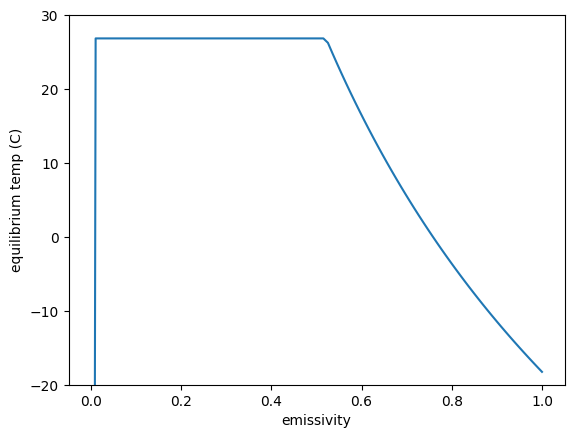

In [ ]:
### Answer Here
a = 0.3
S = 1367.6
sigma = 5.67e-8
def IncomingRadiationPerSquareMeter():
  return (1-a) * S/4

def OutgoingRadiationPerSquareMeter(T,epsilon):
  return epsilon * sigma * (T**4)

def diff(T,epsilon):
    return abs(IncomingRadiationPerSquareMeter()-OutgoingRadiationPerSquareMeter(T,epsilon))

epsilons =np.linspace(0,1,100)
temperatures =[]
for e in epsilons:
    ans = opt.minimize(diff,[10],args=(e,), method='COBYLA',bounds=[(0,300)])
    temperatures.append(ans.x[0]-273.15)

plt.plot(epsilons, temperatures)
plt.xlabel("emissivity")
plt.ylabel("equilibrium temp (C)")
plt.ylim(-20,30)
print("epsilon at temp=14degrees = ", epsilons[np.argmin(np.abs(np.array(temperatures)-14))])


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### c. A more accurate emission model

To further improve our model, we need to increase the accuracy of our emission model. The Stefan-Boltzmann law from above applies to a perfect blackbody, which the Earth is not. From experiments, we can measure that near the Earth's temperature,

$$
P_{out} = A + B T_{c},
$$

where
* $A=221.2$ W/m<sup>2</sup>
* $B=1.3$ W/m<sup>2</sup> K
* $T_c$ is the temperature in Celcius.

Change your radiation function to use $A+BT_c$.  Your function should take $T$ in Kelvin but needs to convert it to Celsius to work here.

Check that these new parameters give a much closer equilbrium temperature (for the pre-industrial average) of 13.94&deg; C.

<details>
If you were to linearize the Stefan-Boltzmann law around 0 Celcius, you would get
$\epsilon \sigma (T_0 + T_c)^4 \approx \epsilon \sigma(T_0^4 + 4 T_0^3 T_c) = A + BT_c$
where $T_0=273.15$ and $T_c$ is the temperature in Celsius.

Plugging in our numbers from previous parts of the exercise, we get $A=195.94$ W/m<sup>2</sup> and $B=2.87$  W/m<sup>2</sup> K. This is close to the measured values, which is reassuring.

If you used these naiive values, you'd find that we get a temperature $T=15.11878309$.
</details>

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
### Answer Here
A,B = 221.2,1.3
def OutgoingRadiationPerSquareMeter(T):
  return A+B*(T-273.15)

def diff(T): return abs(IncomingRadiationPerSquareMeter()-OutgoingRadiationPerSquareMeter(T))

ans =opt.minimize(diff,[10],method='COBYLA',bounds=[(0,300)])
print("Equilibrium temp: ", ans.x[0]-273.15)

Equilibrium temp:  13.946099999999944


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (start)"></img><br></div>


We will be building up a dictionary with the relevant parameters in it - so far
```
params = {
    'alpha' : 0.3,
    'A' : 221.2  ,
    'B' : 1.3
    }
```


### d. The effects of changing carbon dioxide

Changing carbon dioxide changes $\epsilon$ (and therefore $A$ and $B$); however, typically this is measured in terms of 'forcing,' which is how much more energy from some reference that is reflected back to the Earth's surface.
This is accounted for by adding an additional term that depends on a reference amount of carbon dioxide, resulting in a modified output power of

$$ P_{out} = A + BT_c + r \log \left(\frac{CO_{2;current}}{CO_{2;old}}\right) $$
where $r=-5$ W/m<sup>2</sup> is a proportionality constant, and CO<sub>2</sub> is the concentration of CO<sub>2</sub> in the atmosphere.
You can see that if the CO<sub>2</sub> concentration increases, the power out decreases.

We will use the oldest pre-industrial data (around 1751) as the reference CO<sub>2</sub> concentration.

Below is the Carbon dioxide that is in the air as a function of year (the fractions are fractions of a year).  Plot it:

Text(0.5, 1.0, 'co2 vs year')

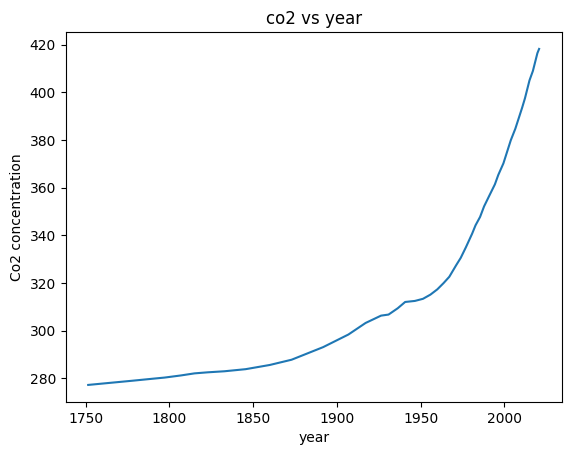

In [ ]:
CO2=np.array([[1751.590620307266, 277.1900826446281],
[1777.9960515400046, 278.95316804407713],
[1790.6841547040233, 279.8347107438017],
[1797.1997437701493, 280.27548209366387],
[1806.8001722200638, 281.1570247933884],
[1815.0283007970431, 282.03856749311296],
[1822.9161897361043, 282.4793388429752],
[1832.8625284845687, 282.92011019283746],
[1845.5506316485873, 283.80165289256195],
[1859.9484389931429, 285.56473829201104],
[1872.9711111344473, 287.7685950413223],
[1891.8062104235146, 293.0578512396694],
[1906.8674850620098, 298.3471074380165],
[1917.128545475548, 303.1955922865013],
[1926.3717223056487, 306.2809917355372],
[1930.8288615623721, 306.72176308539946],
[1936.3010490722172, 309.366391184573],
[1940.7440116773605, 312.0110192837465],
[1946.573450807019, 312.45179063360877],
[1951.3708297016603, 313.3333333333333],
[1955.8194629674358, 315.09641873278235],
[1959.9221859346617, 317.30027548209364],
[1963.6789986033375, 319.9449035812672],
[1967.0927363037795, 322.58953168044076],
[1971.1784472891093, 327.4380165289256],
[1973.903199722768, 330.52341597796146],
[1976.9625211337122, 334.93112947658403],
[1980.6994864901762, 340.6611570247934],
[1982.735253657051, 344.1873278236915],
[1985.4571707603936, 347.71349862258955],
[1987.8303422348704, 352.1212121212121],
[1990.8896636458148, 356.5289256198347],
[1994.2892246946772, 361.37741046831957],
[1996.322156531236, 365.3443526170799],
[1999.3786426118645, 370.1928374655647],
[2003.7762399319522, 379.88980716253445],
[2006.4896510443468, 384.73829201101927],
[2010.5498440568329, 393.55371900826447],
[2012.2397009251579, 397.5206611570248],
[2014.9361000556567, 405.0137741046832],
[2016.9690318922155, 408.9807162534435],
[2019.6654310227143, 416.4738292011019],
[2020.6833146061517, 418.23691460055096]])

### Plot Here
plt.plot(CO2[:,0],CO2[:,1])
plt.xlabel("year")
plt.ylabel('Co2 concentration')
plt.title('co2 vs year')



Now, modify your code to include this additional forcing term into the emitted radiation.  

Compute the equilibrium temperature at the value of carbon dioxide for each year and graph this equilibrium temperature against the year.  Plot it on top of the actual measured temperature which is in `tempData[:,1]` (where the year is in `tempData[:,0]`).   Notice the close agreement between the predicted temperature based on the CO<sub>2</sub> and our 0D EBM vs the actual temperature (actually the prediction is probably closer then it should be expected given the spherical cow nature of our approximation)

```
params = {
    'alpha' : 0.3,
    'A' : 221.2  ,
    'B' : 1.3,
    'r': -5,
    'Current_CO2' : ...
    }
```

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

Text(0.5, 1.0, 'temp vs year')

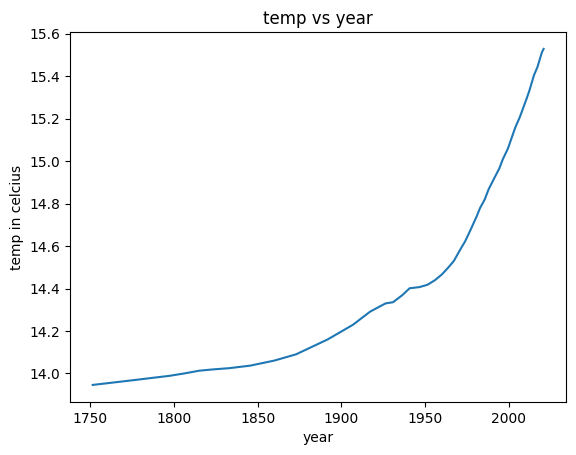

In [ ]:
### Answer HERE
params = {
    'alpha' : 0.3,
    'A' : 221.2  ,
    'B' : 1.3,
    'r': -5,
    'Current_CO2' : CO2[-1,1]#most recent val
    }


CO2ref = CO2[0,1] #from 1751

def IncomingRadiationPerSquareMeter():
  return (1-params['alpha'])*1367.6/4

def OutgoingRadiationPerSquareMeter(T,CO2):
  return params['A']+params['B']*(T-273.15) + params['r']*np.log(CO2/CO2ref)

def diff(T,CO2):
  return abs(IncomingRadiationPerSquareMeter()-OutgoingRadiationPerSquareMeter(T,CO2))

temps =[]
for year,co2 in CO2:
    ans =opt.minimize(diff,[10],args=(co2,),method='COBYLA')
    temps.append(ans.x[0]-273.15)
temps=np.array(temps)
plt.plot(CO2[:,0],temps)
plt.xlabel("year")
plt.ylabel('temp in celcius')
plt.title('temp vs year')

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

Now, in this model, let's compute how much more carbon dioxide we can add to the atmosphere before we can reach two degrees of temperature increase from the 1850 baseline. If we assume that you continue to increase the CO2 in the atmosphere at the same rate that we have been since 2000 (do a linear fit), in what year do we reach a two degree warming, measured from the pre-industrial average of 14&deg;C?


<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
### Answer Here
#interpolate from scipy will find the co2 concentration that corresponds to 16C

from scipy.interpolate import interp1d
interp=interp1d(temps,CO2[:,1],fill_value="extrapolate")
CO2for16 = float(interp(16))

keep=CO2[:,0]>=2000 #only want past 2000
slope,b = np.polyfit(CO2[keep,0],CO2[keep,1],1)
currCO2,currYear = CO2[-1,1],CO2[-1,0]
targetyear = currYear + (CO2for16-currCO2)/slope
print("slope: ",slope)
print("expected +2 warming year = ", targetyear)

slope:  2.3251688560222705
expected +2 warming year =  2042.8348718114662


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

## Exercise 2: Snowball Earth

### a. Climate Dynamics

So far we've focused on the equilibrium temperature of the Earth. It turns out that dynamics can be an important part of the Earth's temperature, since there can be feedback loops. For this part of the exercise, we are going to assume that nothing is pumping tons of CO<sub>2</sub> into the air.

It shouldn't surprise us that we to answer this question, we should start by writing down a differential equation that tells us $\partial T / \partial t$ where $T$ is the temperature and $t$ is the time.

$$ C \frac{\partial T}{\partial t} = \frac{S}{4}(1-\alpha) - (A+B T) $$

(remember in $BT$ we need that $T$ is in Celsius). The r.h.s. of this is just the radiation into the Earth and the radiation out of Earth that we were working on in exercise 1.  Previously, we were just setting this r.h.s. to zero to find equilibrium  - i.e. we wanted the temperature at which the change in temperature over time was zero. But when it’s not zero, it’s telling us how much the temperature changes in a unit of time. If there is more radiation coming in then going out, we expect that the temperature of the planet should heat up.

$C$ is the heat capacity per meter squared of the planet -- heat capacity is how much energy it takes to change the temperature by 1 Kelvin. If the Earth were a big chunk of iron it would heat up pretty quickly (think a pot). On the other hand, if it was a big chunk of granite, it would heat up quite slowly. It turns out that Earth (at least the relevant part that’s heating up) is essentially a big bag of water - i.e. a big ocean, so we use that heat capacity.  The question is how deep do we go, and the answer is about 10 meters.  From the specific heat of water, we can do some unit analysis and get that the heat capacity is $C=4.1813 \times 10^7 \frac{\textrm{J}}{\textrm{K}\cdot \textrm{m}^2}$.  

Set up a first order integrator for this system.  Use a time step $dt$ of 1 month (written in seconds!). You can use `const.seconds_per_month` to get the correct number of seconds.   

Start the temperature of the Earth at 295 degrees Kelvin and allow that temperature to evolve in time.  Plot the temperature as a function of time (in years).
We want to observe three things:
* What is the equilibrium temperature?
* What is the functional form for approaching the equilibrium temperature?
* How long does it take to get there?

Do the same thing starting from a temperature which is less 270 degrees Kelvin.

Do the same if you start 100 degrees Celsius too hot.

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

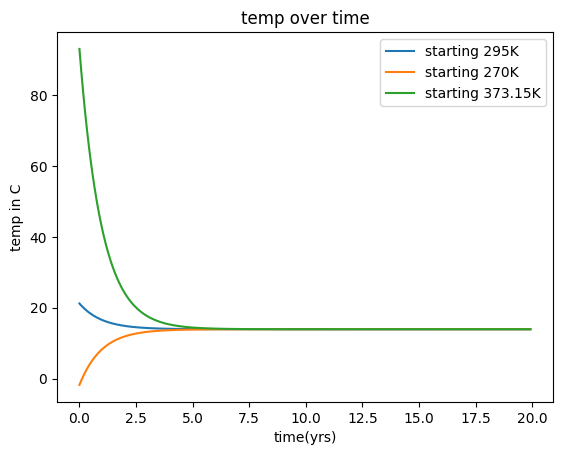

In [ ]:
### Answer Here
C=4.1813e7
dt=const.seconds_per_month
years=20
def dTdt(T):
  return ((1-0.3)*S/4-(A+B*(T-273.15)))/C

def integrate(T0):
  T=T0
  temps=[]
  for i in range(years*12):
    T+=dTdt(T)*dt
    temps.append(T)
  return np.array(temps)

#three starts
T1=integrate(295)
T2=integrate(270)
T3=integrate(373.15) #100 too hot

timeinyears=np.arange(years*12)/12
plt.plot(timeinyears,T1-273.15,label='starting 295K')
plt.plot(timeinyears,T2-273.15,label='starting 270K')
plt.plot(timeinyears,T3-273.15,label='starting 373.15K')
plt.xlabel('time(yrs)')
plt.ylabel('temp in C')
plt.title('temp over time')
plt.legend()




<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

You should have observed the following things:

* The planet eventually equilibrates to the temperature that you predicted in exercise 1. This is the fixed point of that equation (i.e. if you start there you stay there).

* The approach to that equilibrium is exponential.  You actually could have deduced this even analytically by looking at the form of the differential equation.  This tells you that if you are out of equilibrium that you end up getting pushed back towards the equilibrium temperature relatively quickly (both from above and below). The equilibrium temperature is a stable fixed point - if you push away from it, you flow back to it.

* The time scale to fix a 5 degree difference from equilibrium is on the order of a decade.

### b. Snowball Earth

We have seen that the Earth is very stable and largely independent of the initial temperature. But we are missing some important qualitiative physics.  In particular, once water gets cold enough it freezes into ice.  This ice is actually much more reflective of the Sun than water or land and so the albedo is therefore much higher.  This tells us that we should have the albedo (and hence the radiation entering the planet) depend on temperature.

* If the temperature $T<-10$ degrees celsius, then we should have the albedo be $\alpha_i = 0.5$
* If the temperature $T>10$ degrees celsius, then we should have the albedo be $\alpha_0 = 0.3$
* In the intermediate regime $-10 < T < 10$ we can adjust it continuously as $\alpha_i + (\alpha_0-\alpha_i)(T+10)/20$

Write a function `GetAlpha(T)` which returns the temperature dependent albedo and plot the albedo for temperatures from $-20 < T < 20$&deg; Celsius


<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

Text(0.5, 1.0, 'albedo vs temp')

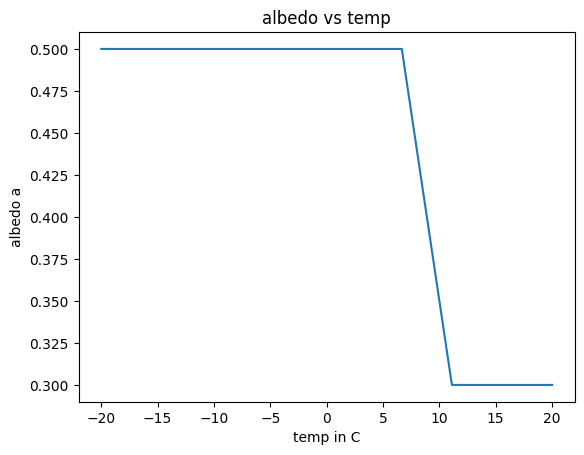

In [ ]:
### Answer Here
ai= .5
a0 = .3

def GetAlpha(T):
  if T<10: return ai
  elif T>10: return a0
  else:
    return ai+(a0-ai)*(T+10)/20

Ts = np.linspace(-20,20,10)
alphas = np.vectorize(GetAlpha)(Ts)
plt.plot(Ts,alphas)
plt.xlabel('temp in C')
plt.ylabel("albedo a")
plt.title('albedo vs temp')

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

Now we want to incorporate our new temperature dependent albedo in our code.  

Loop over at least 10 initial temperatures from $T=-50$ to $T=100$ degrees Celsius and then examine what the temperature is as a function of time.

* Plot temperature as a function of time for many different initial temperatures (all plotted as a different line).   

* Secondly, for each initial temperature, figure out what the final fixed point temperature is. Plot the fixed point temperature on the y-axis as a function of the initial temperature.  





<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

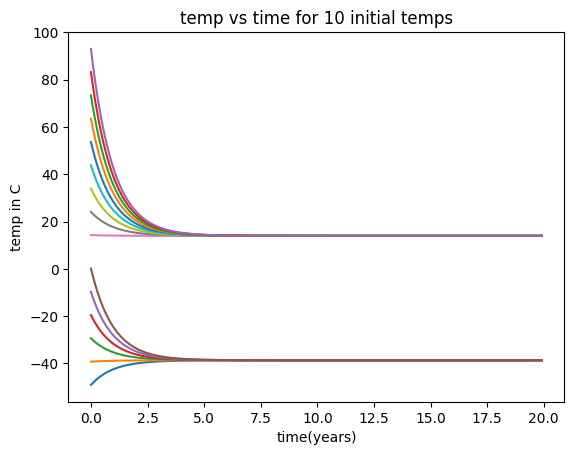

In [ ]:
### Answer Here

def dTdt(T):
  TC = T-273.15
  return ((1-GetAlpha(TC))*S/4-(A+B*(TC)))/C

def integrate(T0):
  T=T0
  temps=[]
  for i in range(years*12):
    T+=dTdt(T)*dt
    temps.append(T)
  return np.array(temps)

initial10 = np.linspace(-50,100,15)
finalT =[]
for temp in initial10:
  series = integrate(temp+273.15)
  plt.plot(timeinyears,series-273.15)
  finalT.append(series[-1] -273.15)

plt.xlabel('time(years)')
plt.ylabel('temp in C')
plt.title('temp vs time for 10 initial temps')
plt.show()

Text(0.5, 1.0, 'final temp vs initial temp (fixed point)')

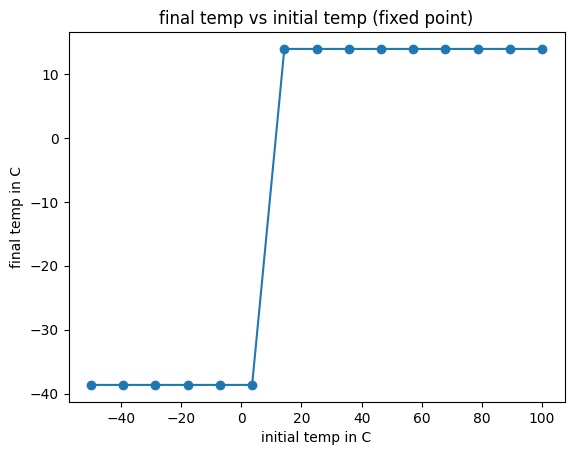

In [ ]:
plt.plot(initial10, finalT,'o-')
plt.xlabel('initial temp in C')
plt.ylabel('final temp in C')
plt.title('final temp vs initial temp (fixed point)')

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

What you should find is two stable fixed points separated by an unstable fixed point (which you might not have seen).  The final temperature that the Earth evolves to depends on the initial temperature.  This history-dependent effect is a result of a feedback loop--lower temperatures means more ice, and more ice means less absorbed radiation from the Sun.

There is some geological evidence that this happened in the past; either all (or a very large fraction) of the Earth was covered by glacial ice -- snowball Earth.  It is possible to switch between these fixed points through large scale events, such as volcanic activity, meteor strikes, solar insolation due to changes in the Sun's output or orbital oscillation. It's particularly striking how quickly very similar initial conditions result in very different output.


### c. Hysteresis

Because the Earth takes some time (of order 5 years) to respond to changes, it exhibits hysteresis, which refers to a lag in physical properties compared to the stimulus.  Let's see this explicitly.  Let's start with a warm planet (10 degrees Celsisus) and the current solar insolation. Now let's do the following:

Start S = 1367.6 J/m<sup>2</sup>
 * for step in range(0,10):
   * Propagate the Earth's temperature forward by 5 years.
   * Decrease S by 20 W/m<sup>2</sup>  
 * for step in range(0,40):
   * Propagate the Earth's temperature forward by 5 years.
   * Increase S by 5 W/m<sup>2</sup>  
 * Now keeping S constant, propagate the temperature forward by 50 more years.

Plot the temperature versus year and irradiation versus year over the 300 year span of your simulation.  Notice that there is a hystersis.  Even after the solar insolation has gotten back to where it was originally, the temperature has not recovered. The only way to get back to the original high temperature is to melt the ice somehow.

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

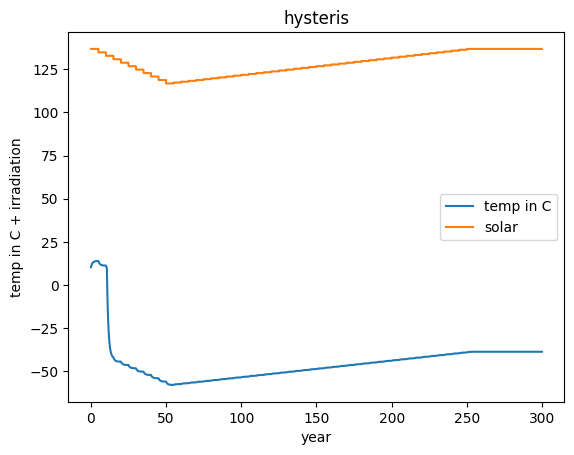

In [ ]:
### Answer Here
S0=1367.6

def dTdt(T,S):
    TC = T -273.15
    return ((1 -GetAlpha(TC)) *S/4 -(A+ B *TC)) /C

def integrate(T,S,years):
  temps=[]
  for i in range(years*12):
    T+=dTdt(T,S)*dt
    temps.append(T)
  return T,np.array(temps)

T=283.15
S=S0
allS=[]
allT=[]

#1
for i in range(10):
    T,out = integrate(T,S,5)
    allT.extend(out-273.15) #converting to C
    allS.extend([S]*len(out))
    S-= 20

#2
for i in range(40):
    T,out = integrate(T,S,5)
    allT.extend(out -273.15)
    allS.extend([S]*len(out))
    S +=5

#3
T,out = integrate(T,S,50)
allT.extend(out-273.15)
allS.extend([S]*len(out))

allT,allS, years = np.array(allT),np.array(allS), np.arange(len(allT))/12

plt.plot(years,allT, label="temp in C")
plt.plot(years,allS/10, label="solar")

plt.xlabel("year")
plt.ylabel("temp in C + irradiation")
plt.title("hysteris")
plt.legend()

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

## Exercise 3: One-dimensional EBM

We want to implement a more accurate climate model.  Previously, we had worked on a zero-dimensional model.  To add some realism to this model, we are going to add an additional dimension splitting up the world into different latititudes.  This is the most important effect that we are missing as these different latitudes get significantly different sunlight.  

The energy balance model that we will work with will be

$$ C \frac{dT_s(\phi)}{dt} = (1-\alpha(\phi;T)) Q(\phi) - (A+B T_s(\phi)) + \frac{D}{\cos⁡\phi } \frac{\partial }{\partial \phi} \left(   \cos⁡\phi  ~ \frac{\partial T}{\partial \phi} \right)$$

where $\phi$ is the latitude (the equator is 0 degrees and the south and north poles are at -90 and +90 respectively)

Be careful here because `climlab` works with degrees and most numpy functions work with radians.


### a. Latitude dependence of solar isolation and albedo


The first thing you should notice is that there are now a lot of different terms that depend on the latitude, mainly the solar iradiation, temperature, and there is a diffusion part that transports heat between latitudes.

To treat this, you need to discretize the Earth into a number of different latitude zones.  You could just discretize your own latitudes but because we need to sync our functions with yours, we will give you the latitude zones that you are going to use.  You can get them by calling the following function:
```
def GetLatitudes():
  sfc = climlab.domain.zonal_mean_surface(num_lat=180, water_depth=10.)
  lat = sfc.lat.points
  return lat
```

The first important thing that depends on latitude is the amount of radiation from the Sun is being deposited on different parts of the Earth.  The equator gets significantly more sunlight then the poles.  

The package `climlab` has a function that computes this conveniently. You can get the insolation per  by calling the following function.

```
def GetInsolation(param):
  model1 = climlab.EBM_annual(name='EBM with interactive ice line',
                            num_lat=180,timestep=const.seconds_per_month,
                            **param)
  model1.compute()
  Q= np.array([i[0] for i in model1.insolation])
  return Q
```
which will return the amount of watts per square meter of each latitude zone on the Earth.
We will use the following parameters to model Earth

```
params = {
    'D':0.6, #Diffusion constant D
    'A':210, # Emission parameters
    'B':2,
    'a0':0.354, #base albedo
    'a2':0.25,  # How albedo changes with latitude
    'ai':0.5,  # albedo of ice
    'Tf':-10., # Temperature at which ice is completely formed.
    'CO2':283., #amount of CO2 in the atmosphere
    'C':4.18130000e+07, #Heat capacity per m^2 in the
    'r':5, # forcing constant for CO2
    'timeStep':const.seconds_per_month
    }
```



* Plot the insolation as as a function of latitude
* Measure the average radiation on the Earth and verify that it is approximately 1370/4 (the number we were using before). You need to be careful when you do this.  When averaging over a sphere, you need to weight by the volume at that latitude by $\cos \phi$.  It will be useful to write a function which takes a array over the latitudes and averages them correctly (we will need this for the average temperature of the planet as well).


<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

Text(0.5, 1.0, 'insolation vs latitude')

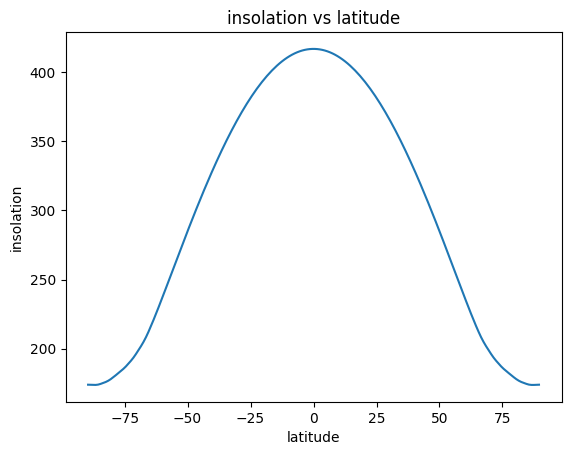

In [ ]:
### Answer Here
def GetLatitudes():
  sfc = climlab.domain.zonal_mean_surface(num_lat=180, water_depth=10.)
  lat = sfc.lat.points
  return lat

lat=GetLatitudes()

def GetInsolation(param):
  model1 = climlab.EBM_annual(name='EBM with interactive ice line',
                            num_lat=180,timestep=const.seconds_per_month,
                            **param)
  model1.compute()
  Q= np.array([i[0] for i in model1.insolation])
  return Q

insol=GetInsolation(params)

params = {
    'D':0.6, #Diffusion constant D
    'A':210, # Emission parameters
    'B':2,
    'a0':0.354, #base albedo
    'a2':0.25,  # How albedo changes with latitude
    'ai':0.5,  # albedo of ice
    'Tf':-10., # Temperature at which ice is completely formed.
    'CO2':283., #amount of CO2 in the atmosphere
    'C':4.18130000e+07, #Heat capacity per m^2 in the
    'r':5, # forcing constant for CO2
    'timeStep':const.seconds_per_month
    }

plt.plot(lat,insol)
plt.xlabel('latitude')
plt.ylabel('insolation')
plt.title('insolation vs latitude')

In [ ]:
#spherical average
def SphereAvg(F,lat):
    W =np.cos(np.deg2rad(lat))
    return np.sum(F*W)/np.sum(W)
print(SphereAvg(insol,lat))

341.3486252167457


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

We will treat the latitude dependence of the albedo next.  Let's use the following simple model:

  * If $T<T_f$, the albedo is $\alpha_i = 0.5$.
  * Otherwise, set the albedo to $\alpha_0 + a_2 P_2(\sin \phi)$ where $P_2$ is the second legendre polynomial and can be gotten by doing `legendre.P2(x)`.


We will also start with initial conditions as follows.
```
def GetInitial(lat):
  initial = np.array(12. - 40. * legendre.P2(np.sin(np.deg2rad(lat))))+273.15
  return initial
initialTemperature=GetInitial(lat)
```
Plot the initial temperature. Compute the average of the initial temperature and verify that it is reasonable for the Earth.

Write a function which generates the Albedo when given an array of temperatures (and the parameters). For the initial temperature, check that your albedo has some values that are exactly 0.5 which correspond to ice-covered regions. Check that the ice-covered regions occur where you expect.


<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

global avg temp: 11.99949226563433


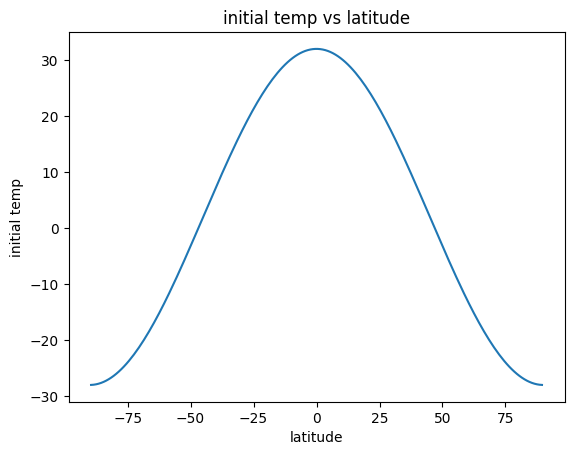

In [ ]:
### Answer Here
def GetInitial(lat):
  initial = np.array(12. - 40. * legendre.P2(np.sin(np.deg2rad(lat))))+273.15
  return initial
initialTemperature=GetInitial(lat)

T0=GetInitial(lat)
plt.plot(lat,initialTemperature-273.15)
plt.xlabel('latitude')
plt.ylabel('initial temp')
plt.title('initial temp vs latitude')
print("global avg temp:", SphereAvg(initialTemperature,lat)-273.15)

Text(0, 0.5, 'albedo')

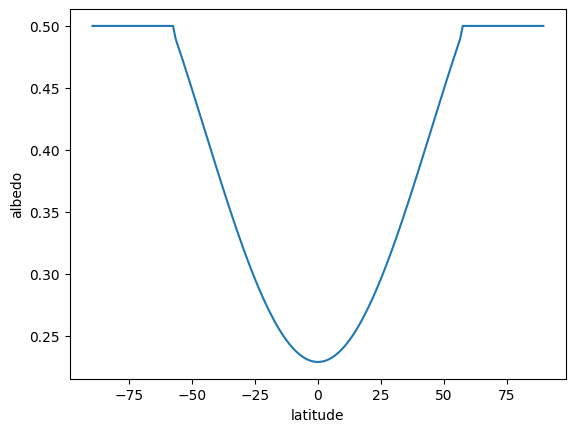

In [ ]:
def GetAlbedo(T,params):
  TC=T-273.15
  alpha=np.zeros_like(TC,dtype=float)
  cold=TC<params['Tf']
  warm = ~cold #opposite of cold
  alpha[cold]=params['ai']
  alpha[warm]=params['a0']+params['a2']*legendre.P2(np.sin(np.deg2rad(lat)))[warm]

  return alpha

initialalpha = GetAlbedo(T0,params)
plt.plot(lat,initialalpha)
plt.xlabel('latitude')
plt.ylabel('albedo')


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### b. A diffusion-less planet

We are now in a position to deal with the incoming and outgoing radiation (but not yet the diffusion).  This is implementing the same energy balance that you had previously except that now you are going to simultaneously deal with all the latititudes. Write a function to time evolve this for 100 years.
* Plot the average temperature vs time (getting a point once a year)
* Plot the final temperature profile
* The final temperature difference between the equator and the pole (i.e. just the max - min difference)

You should be running with time steps of 1 month.   



<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

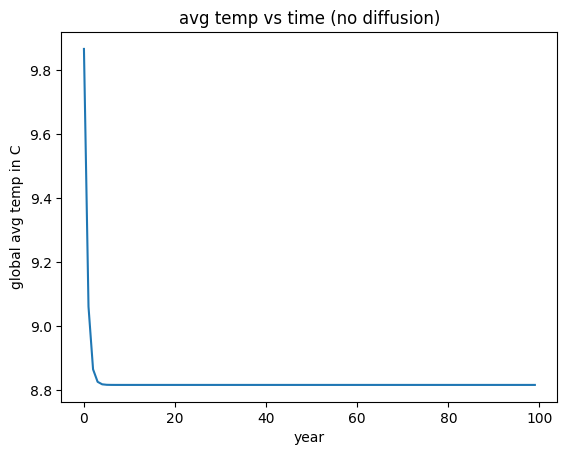

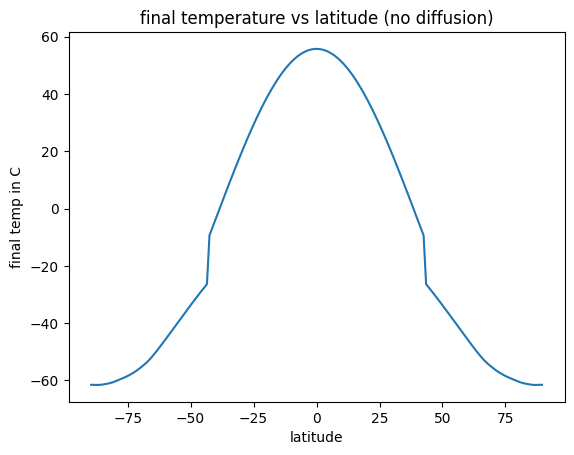

final temp difference: 117.25051460516647


In [ ]:
### Answer Here
def StepNoDiffusion(T,inso,params):
    TC =T-273.15
    alpha =GetAlbedo(T,params)
    A,B,C =params['A'],params['B'],params['C']
    dt =params['timeStep']

    dTdt =((1-alpha) *inso-(A+B *TC))/C
    return T +dTdt *dt

T =T0.copy()
years=100
annualAvg =[]

for year in range(years):
    for i in range(12):
        T =StepNoDiffusion(T,insol,params)
    annualAvg.append(SphereAvg(T,lat))

plt.plot(np.arange(years),np.array(annualAvg)-273.15)
plt.xlabel("year")
plt.ylabel("global avg temp in C")
plt.title("avg temp vs time (no diffusion)")
plt.show()

plt.plot(lat,T-273.15)
plt.xlabel("latitude")
plt.ylabel("final temp in C")
plt.title("final temperature vs latitude (no diffusion)")
plt.show()

print("final temp difference:",(T-273.15).max()-(T-273.15).min())

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>


You should get a pretty crazy result in this case. Essentially every latitude is doing its own thing; they are independent because the diffusion transports heat between the latitudes and we have ignored it so far.  Therefore, you're going to see some pretty sharp jumps in the temperature as you change latitudes.  In addition, there is a large (~117&deg; C) difference in temperature between the poles and the equator.


### c. Diffusion

We are missing an important piece of the physics once we've moved to 1D.  The temperature at different latitudes can interact with each other.  Heat can move both by diffusion and advection.  Here we are going to concern ourself primarily with diffusion.  We've seen diffusion before in this class but typically as $\partial^2/ \partial x^2$.  In our case though we are on a sphere and need to do something different essentially writing our gradient in spherical coordinates - see the last term of our energy balance model.    

We'd like to go ahead and implement the diffusion just like we've done in previous cases using a finite difference stencil. Unfortunately, this won't work here naively (we run into numerical instabilities at the poles).  To fix this is out of scope for this assignment, so instead we will give you a function you can call
```
def Diffuse(T,params):
  sfc = climlab.domain.zonal_mean_surface(num_lat=180, water_depth=10.)
  Ts = climlab.Field(np.array(T), domain=sfc)
  d = climlab.dynamics.MeridionalHeatDiffusion(name='Diffusion',state=Ts, D=params['D'],timestep=params['timeStep'])
  d.step_forward()
  T=np.squeeze(Ts)
  return T
```
by going
```
T=Diffuse(T,params)
```

This will defuse through a time-step of `params['timeStep']`.

Add the diffusion to your timestepping from part b as an additional step. Then

* Plot the average temperature vs time (getting a point once a year)
* Plot the final temperature profile
* The final temperature difference between the equator and the pole (i.e. just the max - min difference)
* The ice line: the latitude at which the temperature becomes less than -10.

The diffusion constant $D$ has been tuned to give a reasonable temperature difference between the poles and the Earth.  



<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

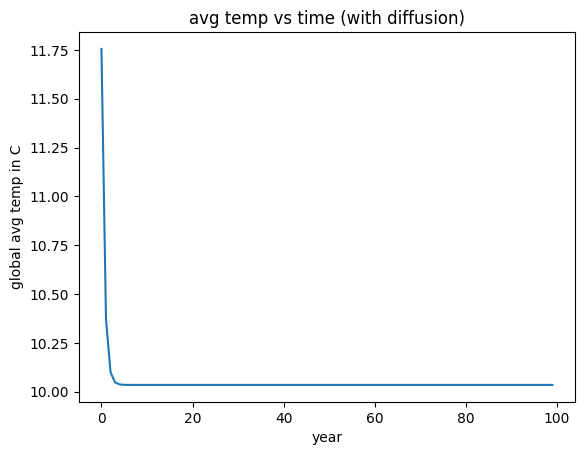

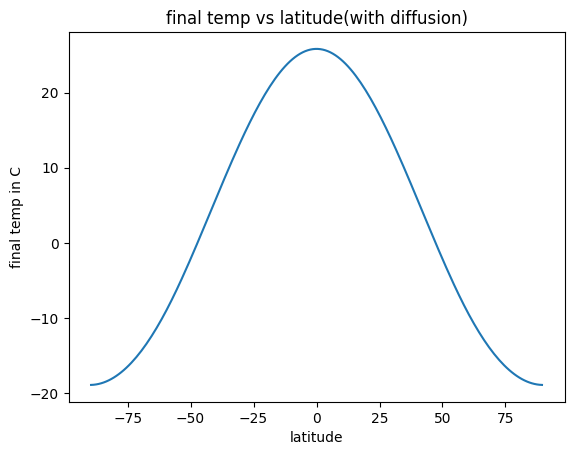

final temp difference: 44.69697583431653
ice line latitude: -61.5


In [ ]:
### Answer Here
def Diffuse(T,params):
  sfc = climlab.domain.zonal_mean_surface(num_lat=180, water_depth=10.)
  Ts = climlab.Field(np.array(T), domain=sfc)
  d = climlab.dynamics.MeridionalHeatDiffusion(name='Diffusion',state=Ts, D=params['D'],timestep=params['timeStep'])
  d.step_forward()
  T=np.squeeze(Ts)
  return T

def StepDiffusion(T,params,insol):
    alpha =GetAlbedo(T,params)
    TC = T-273.15
    dT =((1-alpha)*insol -(params['A']+params['B'] *TC)) /params['C']
    T =T+dT *params['timeStep']
    T = Diffuse(T, params)
    return T

T =GetInitial(lat).copy()
years=100
months=years*12
averageT =[]

for m in range(months):
    T = StepDiffusion(T,params,insol)
    if m %12 == 0: averageT.append(SphereAvg(T,lat)-273.15)

finalT = T-273.15
tempdiff = np.max(finalT)-np.min(finalT)

iceline = lat[np.where(finalT < -10)[0][np.argmin(np.abs(lat[np.where(finalT < -10)[0]]))]]

plt.plot(np.arange(len(averageT)), averageT)
plt.xlabel("year")
plt.ylabel("global avg temp in C")
plt.title("avg temp vs time (with diffusion)")
plt.show()

plt.plot(lat,finalT)
plt.xlabel("latitude")
plt.ylabel("final temp in C")
plt.title("final temp vs latitude(with diffusion)")
plt.show()

print("final temp difference:", tempdiff)
print("ice line latitude:",iceline)


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

**Acknowledgements:**
* Bryan Clark (original)

This assignment was partially uses climlab and was partially inspired by <a href="https://brian-rose.github.io/ClimateLaboratoryBook/home.html">Brian Rose's climate laboratory course</a> and MIT course on <a href="https://computationalthinking.mit.edu/Fall24/">Introduction to Computational Thinking</a>
© Copyright 2020

--